### PCA
#### iris 

- from sklearn.decomposition import PCA

In [4]:
import pandas as pd
import numpy as np

from sklearn import datasets

In [5]:
iris = datasets.load_iris()

In [6]:
x = iris.data[:,[0,2]]
y = iris.target
print(x.shape, y.shape)

(150, 2) (150,)


In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
feature_name = [iris.feature_names[0],iris.feature_names[2]]
x_data = pd.DataFrame(x, columns = feature_name)
x_data.head()

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [10]:
y_data = pd.DataFrame(y, columns = ["target"])
y_data.head()

,target
0,0
1,0
2,0
3,0
4,0


In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components = 2)
pca.fit(x_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
pca.explained_variance_ #eigen value

array([3.66189877, 0.1400726 ])

In [10]:
pca.components_ #eigen vector

array([[ 0.39360585,  0.9192793 ],
       [-0.9192793 ,  0.39360585]])

In [12]:
PCscore = pca.transform(x_data)
PCscore[0:5]

array([[-2.46024094, -0.24479165],
       [-2.53896211, -0.06093579],
       [-2.70961121,  0.08355948],
       [-2.56511594,  0.25420858],
       [-2.49960153, -0.15286372]])

In [13]:
x_data[0:5]

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [15]:
eigen_v = pca.components_.transpose()
print(eigen_v)

[[ 0.39360585 -0.9192793 ]
 [ 0.9192793   0.39360585]]


In [17]:
mX=np.matrix(x)

for i in range(x.shape[1]):
    mX[:,i]=mX[:,i]-np.mean(x[:,i])
    
mX_df=pd.DataFrame(mX)

In [20]:
(mX*eigen_v)[0:5]

matrix([[-2.46024094, -0.24479165],
        [-2.53896211, -0.06093579],
        [-2.70961121,  0.08355948],
        [-2.56511594,  0.25420858],
        [-2.49960153, -0.15286372]])

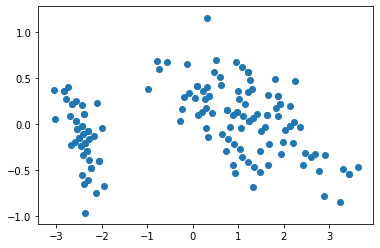

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(PCscore[:,0],PCscore[:,1])
plt.show()

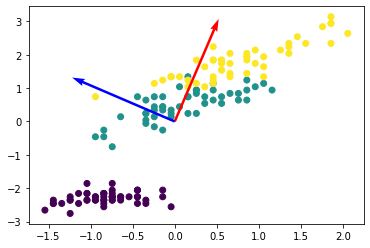

In [24]:
plt.scatter(mX_df[0],mX_df[1], c = y)
origin = [0], [0]
plt.quiver(*origin, eigen_v[0,:], eigen_v[1,:], color= ['r','b'],scale = 3)
plt.show()

- #### 회귀분석

- from sklearn.linear_model import LogisticRegression
- from sklearn.metrics import confusion_matrix

In [25]:
x2 = iris.data
pca2 = PCA(n_components = 4)
pca2.fit(x2)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [26]:
pca2.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

In [27]:
PCscore2 = pca2.transform(x2)[:,0:2]

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [29]:
clf = LogisticRegression(solver = "sag", multi_class = "multinomial").fit(x2, y)

C:\Users\EonKim\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [30]:
clf2 = LogisticRegression(solver = 'sag', multi_class = "multinomial").fit(PCscore2, y)

In [32]:
y_pred = clf2.predict(PCscore2)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2
 2 2]


In [33]:
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  2, 48]], dtype=int64)